In [24]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

sys.path.append('../')
from utils import imshow

%matplotlib inline

# Intensity Transformation and Spatial Filtering

The **spatial domain** is the (height-width) plane containing the pixels of an image. The transformations on spatial
domain usually involve transforming the intensity of a pixel according to the intensity of its neighbours. When the
shape of the neighbourhood is fixed, we move the neighbourhood template (also called mask, kernel, window, or filter)
across the spatial domain, and perform a transformation at each stop. This kind of procedure is called *spatial 
filtering*.

In the simplest case, the neighbourhood consists of only the pixel to be transformed, and the transformation can be
represented as:

$$ s = T(r) $$

where $r, s$ are the intensities of the same pixel before and after the transformation respectively. We call this
kind of procedure *intensity transformation*.

## Intensity Transformations

### Image Negatives

The negative of an image with intensity levels in range $[0, L - 1]$ is given by:

$$ s = L - 1 - r $$

Suited for enhancing white or gray detail embedded in dark regions of an image, especially when the black areas are
dominant in size.

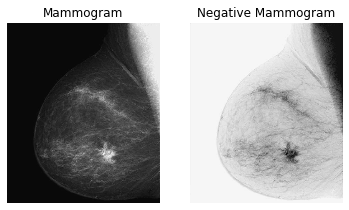

In [28]:
mammogram = cv.imread('../resource/Fig0304(a)(breast_digital_Xray).tif', 
                      cv.IMREAD_GRAYSCALE)

# Grayscale image has 2**8 grayscales.
negative_mammogram = 2 ** 8 - 1 - mammogram

# Plot these two images side by side.
imshow(mammogram, 121, title='Mammogram')
imshow(negative_mammogram, 122, title='Negative Mammogram')

plt.show()

### Log Transformations

The general form of log transformation is:

$$ s = c\log(1 + r) $$

where $r \ge 0$

**Characteristic:**
* map a narrow range of low intensity values into a wider range.
* map a wide range of high intensity values into a narrower range.

Suited for expanding the values of dark pixels while compressing the higher-level values.

### Gamma Transformations

The general form of gamma (power-law) transformation is:

$$ s = c\; r^\gamma $$

where $c, \gamma$ are positive constants.

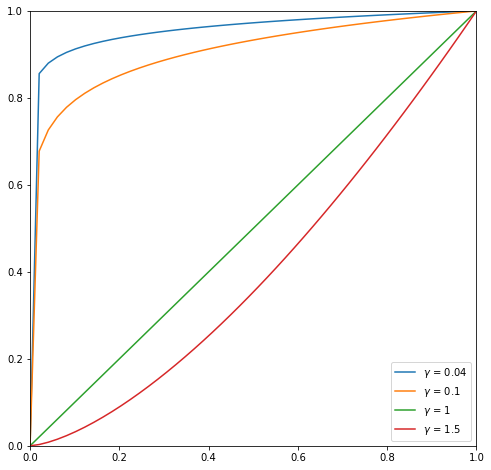

In [48]:
xs = np.linspace(0, 1)

gammas = (0.04, 0.10, 1, 1.5)

plt.figure(figsize=(8, 8))
plt.axis([0, 1, 0, 1])
for gamma in gammas:
    plt.plot(xs, np.power(xs, gamma), label=f'$\gamma$ = {gamma}')
plt.legend()
plt.show()